In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pytz

In [2]:
df1 = pd.read_csv('Mburicao_10_05_2022_10min.csv')
df2 = pd.read_csv('Precipitaciones_AISP_10min.csv')
df3 = pd.read_csv('Precipitaciones_SND_10min.csv')



In [3]:
df1_copy = df1.copy() # Realiza una copia del dataframe original
df1_copy['Fecha'] = pd.to_datetime(df1_copy['Fecha'], format='%d/%m/%Y %H:%M') # Conversión de la columna fecha a datetime
df1_copy.set_index('Fecha', inplace = True) # Coloca fecha como indice
df1_copy.index = df1_copy.index.tz_localize('America/Asuncion', ambiguous='NaT',nonexistent='shift_forward')
datos_mbu = df1_copy['Nivel del agua  Arroyo Mburicao'] # Toma los datos de niveles de asunción
#datos_mbu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
df_new = pd.DataFrame(datos_mbu) # Crea un dataset con los datos de asunción procesados
df_new.columns = ['nivel'] # Nombra la columna del dataset como 'nivel'

In [4]:
df_new.tail()

,nivel
Fecha,
2022-05-10 13:40:00-04:00,0.09
2022-05-10 13:50:00-04:00,0.09
2022-05-10 14:00:00-04:00,0.09
2022-05-10 14:10:00-04:00,0.09
2022-05-10 14:20:00-04:00,0.09


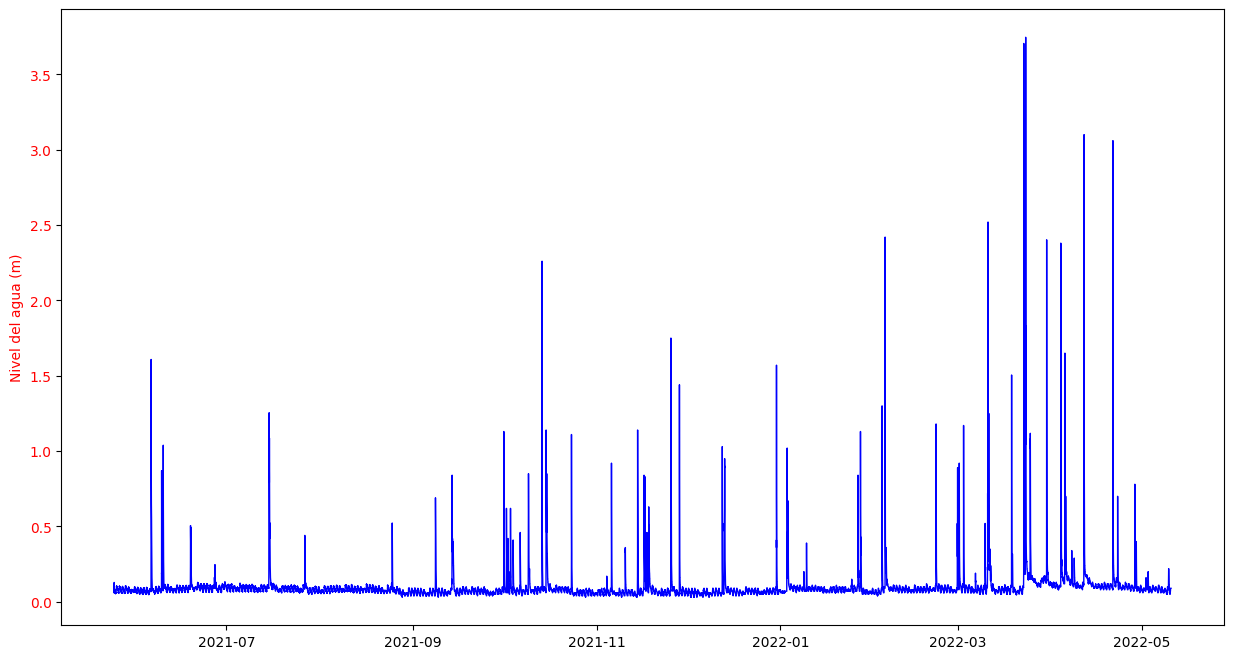

In [5]:
start_date = '2021-05-24 17:50'
end_date = '2022-05-10 14:20'
df_filtered_new = df_new.loc[start_date:end_date]
fig, ax1 = plt.subplots(figsize=(15, 8))
# Primer gráfico: Nivel del agua (eje y principal)
ax1.plot(df_filtered_new.index, df_filtered_new['nivel'], marker='', linestyle='-', color='b', linewidth=1, label='Nivel del agua')
ax1.set_ylabel('Nivel del agua (m)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.show()

In [6]:
df2_copy = df2.copy() # Realiza una copia del dataframe original de la precipitacion el aeropuerto
df2_copy['Fecha'] = pd.to_datetime(df2_copy['Fecha'], format='%m/%d/%Y %H:%M') # Conversión de la columna fecha a datetime
df2_copy.set_index('Fecha', inplace = True) # Coloca fecha como indice
##########################
df2_copy.index = df2_copy.index.tz_localize('utc').tz_convert('America/Asuncion')

########################
datos_AISP = df2_copy['Precipitaciones'] # Toma los datos de niveles de asunción
#datos_mbu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
df_AISP = pd.DataFrame(datos_AISP) # Crea un dataset con los datos de asunción procesados
df_AISP.columns = ['Precipitacion_AISP_mm'] # Nombra la columna del dataset como 'nivel'
df_AISP.head()

,Precipitacion_AISP_mm
Fecha,
2021-05-24 13:50:00-04:00,0.0
2021-05-24 14:00:00-04:00,0.0
2021-05-24 14:10:00-04:00,0.0
2021-05-24 14:20:00-04:00,0.0
2021-05-24 14:30:00-04:00,0.0


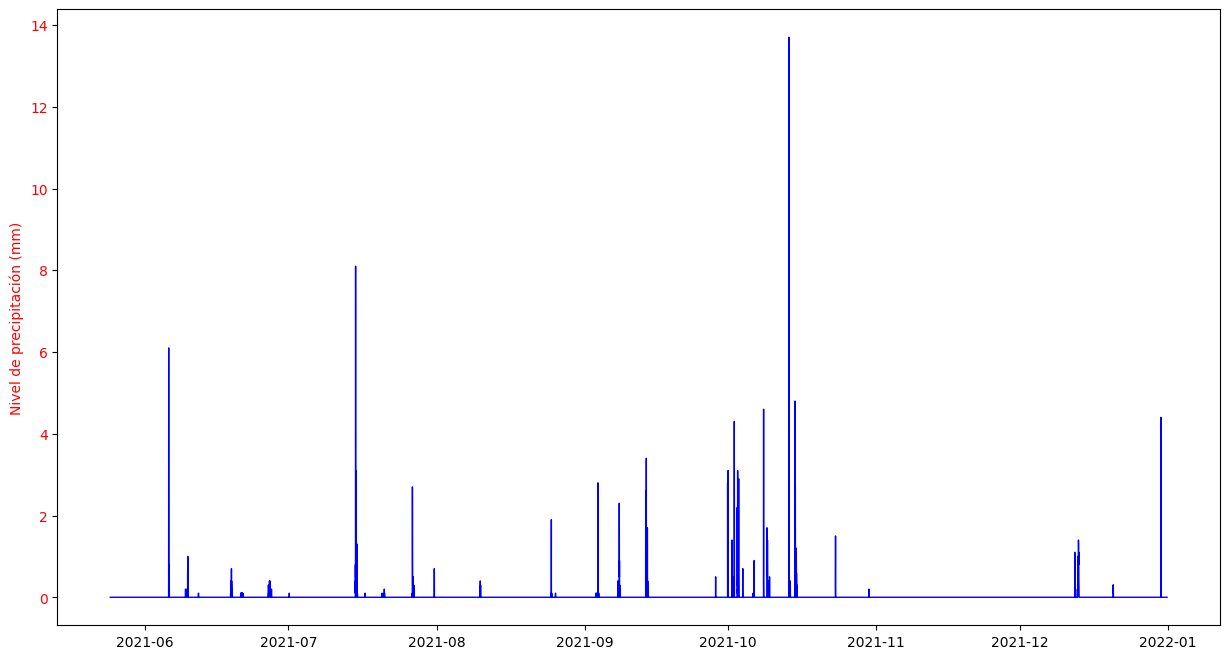

In [7]:
start_date = '2021-05-24 17:50'
end_date = '2021-12-31 23:50'
df_filtered_AISP = df_AISP.loc[start_date:end_date]
fig, ax1 = plt.subplots(figsize=(15, 8))
# Primer gráfico: Nivel del agua (eje y principal)
ax1.plot(df_filtered_AISP.index, df_filtered_AISP['Precipitacion_AISP_mm'], marker='', linestyle='-', color='b', linewidth=1, label='Nivel del agua')
ax1.set_ylabel('Nivel de precipitación (mm)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.show()

In [8]:
valor = df_AISP.loc['2021-07-15 04:40']
valor

Precipitacion_AISP_mm    2.0
Name: 2021-07-15 04:40:00-04:00, dtype: float64

In [9]:
df3_copy = df3.copy() # Realiza una copia del dataframe original de la precipitacion SND
df3_copy['Fecha'] = pd.to_datetime(df3_copy['Fecha'], format='%m/%d/%Y %H:%M') # Conversión de la columna fecha a datetime
df3_copy.set_index('Fecha', inplace = True) # Coloca fecha como indice
#############################################
df3_copy.index = df3_copy.index.tz_localize('utc').tz_convert('America/Asuncion')
#################################################

datos_SND = df3_copy['Precipitaciones'] # Toma los datos de niveles de asunción
#datos_mbu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
df_SND = pd.DataFrame(datos_SND) # Crea un dataset con los datos de asunción procesados
df_SND.columns = ['Precipitacion_SND_mm'] # Nombra la columna del dataset como 'nivel'
df_SND.head()

,Precipitacion_SND_mm
Fecha,
2021-05-24 13:50:00-04:00,0.0
2021-05-24 14:00:00-04:00,0.0
2021-05-24 14:10:00-04:00,0.0
2021-05-24 14:20:00-04:00,0.0
2021-05-24 14:30:00-04:00,0.0


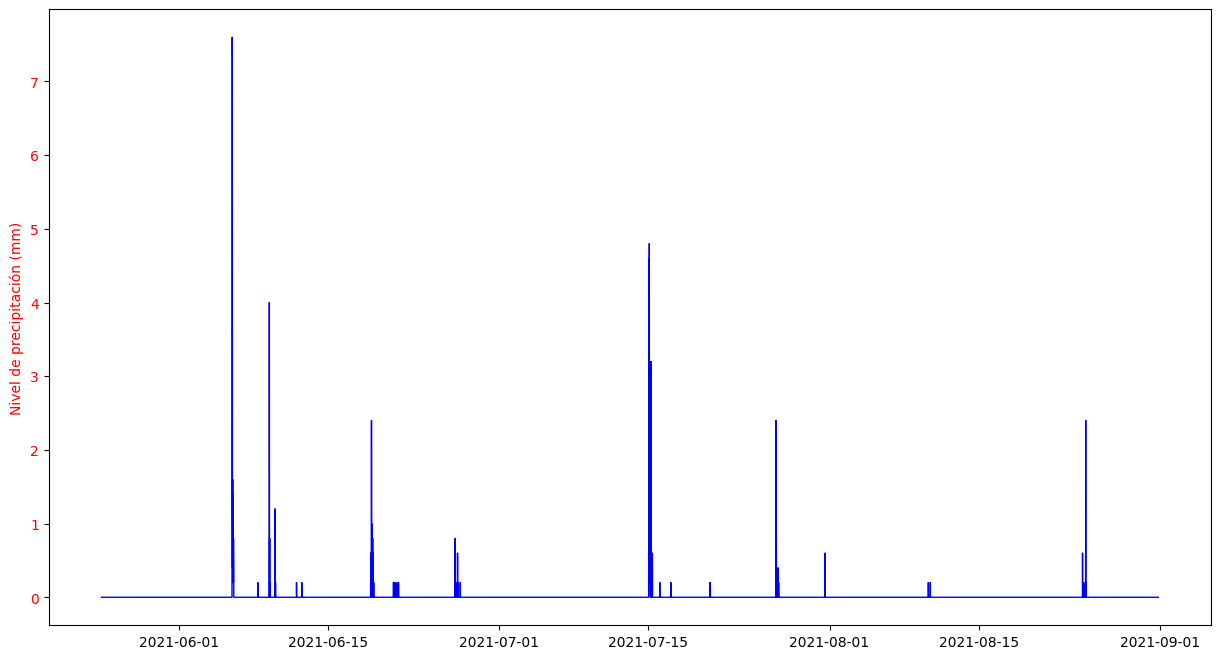

In [10]:
start_date = '2021-05-24 17:50'
end_date = '2021-08-31 23:50'
df_filtered_SND = df_SND.loc[start_date:end_date]
fig, ax1 = plt.subplots(figsize=(15, 8))
# Primer gráfico: Nivel del agua (eje y principal)
ax1.plot(df_filtered_SND.index, df_filtered_SND['Precipitacion_SND_mm'], marker='', linestyle='-', color='b', linewidth=1, label='Nivel del agua')
ax1.set_ylabel('Nivel de precipitación (mm)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.show()

In [11]:
valor = df_SND.loc['2021-07-15 04:40']
valor

Precipitacion_SND_mm    1.6
Name: 2021-07-15 04:40:00-04:00, dtype: float64

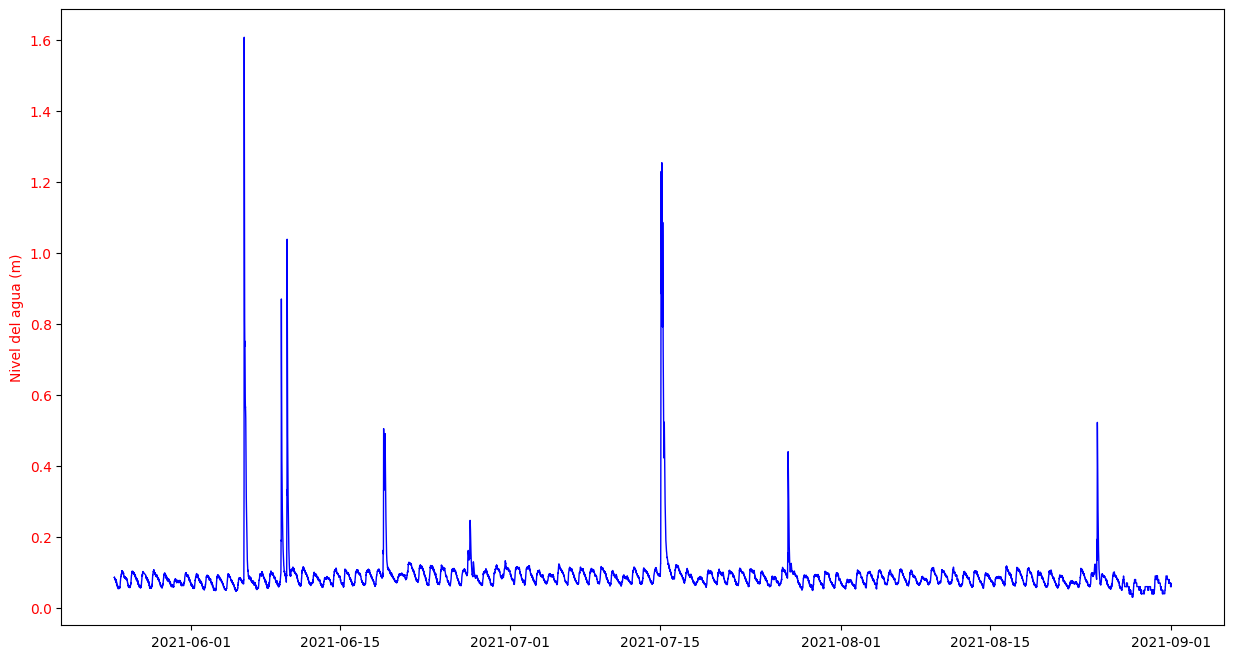

In [59]:
start_date = '2021-05-24 20:00'
end_date = '2021-08-31 23:50'
df_filtered_new = df_new.loc[start_date:end_date]
fig, ax1 = plt.subplots(figsize=(15, 8))
# Primer gráfico: Nivel del agua (eje y principal)
ax1.plot(df_filtered_new.index, df_filtered_new['nivel'], marker='', linestyle='-', color='b', linewidth=1, label='Nivel del agua')
ax1.set_ylabel('Nivel del agua (m)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.show()

In [6]:
from scipy.signal import find_peaks
def plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP, interval=30, interval_unit='minutes'):
    """
    Grafica el nivel del agua y los niveles de precipitación en un intervalo de tiempo especificado.

    Parameters:
    - start_date: Fecha de inicio del intervalo de tiempo.
    - end_date: Fecha de fin del intervalo de tiempo.
    - df_new: DataFrame con datos del nivel del agua.
    - df_SND: DataFrame con datos de precipitación de la zona SND.
    - df_AISP: DataFrame con datos de precipitación de la zona AISP.
    - interval: Intervalo para las etiquetas del eje x (por defecto es 30).
    - interval_unit: Unidad del intervalo ('minutes' o 'hours', por defecto es 'minutes').
    """
    # Filtrar los datos según el rango de fechas
    df_filtered_new = df_new.loc[start_date:end_date]
    df_filtered_SND = df_SND.loc[start_date:end_date]
    df_filtered_SP = df_AISP.loc[start_date:end_date]

    # Encontrar picos y propiedades de los picos
    peaks_new, properties_new = find_peaks(df_filtered_new['nivel'], height=0.5)
    peaks_SND, properties_SND = find_peaks(df_filtered_SND['Precipitacion_SND_mm'], height=1)
    peaks_SP, properties_SP = find_peaks(df_filtered_SP['Precipitacion_AISP_mm'], height=1)

    # Filtrar picos mayores a 0.8 metros
    peaks_new_filtered = peaks_new[properties_new['peak_heights'] > 0.5]
    peaks_SND_filtered = peaks_SND[properties_SND['peak_heights'] > 1]
    peaks_SP_filtered = peaks_SP[properties_SP['peak_heights'] > 1]

    # Encontrar los picos más altos
    max_peak_new = df_filtered_new['nivel'].iloc[peaks_new].max() if len(peaks_new) > 0 else None
    max_peak_SND = df_filtered_SND['Precipitacion_SND_mm'].iloc[peaks_SND].max() if len(peaks_SND) > 0 else None
    max_peak_SP = df_filtered_SP['Precipitacion_AISP_mm'].iloc[peaks_SP].max() if len(peaks_SP) > 0 else None

    # Graficar los datos
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Primer gráfico: Nivel del agua (eje y principal)
    ax1.plot(df_filtered_new.index, df_filtered_new['nivel'], marker='', linestyle='-', color='r', linewidth=1.3, label='Nivel del agua')
    if len(peaks_new_filtered) > 0:
        ax1.plot(df_filtered_new.index[peaks_new_filtered], df_filtered_new['nivel'].iloc[peaks_new_filtered], 'x', color='r', label='Picos Nivel del agua')
    ax1.set_ylabel('Nivel del agua (m)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    # Segundo eje y: Precipitación SND y Precipitación AISP
    ax2 = ax1.twinx()
    ax2.plot(df_filtered_SND.index, df_filtered_SND['Precipitacion_SND_mm'], marker='', linestyle='-', color='b', linewidth=1, label='Precipitación SND')
    if len(peaks_SND_filtered) > 0:
        ax2.plot(df_filtered_SND.index[peaks_SND_filtered], df_filtered_SND['Precipitacion_SND_mm'].iloc[peaks_SND_filtered], 'x', color='b', label='Picos Precipitación SND')
    ax2.plot(df_filtered_SP.index, df_filtered_SP['Precipitacion_AISP_mm'], marker='', linestyle='-', color='g', linewidth=1, label='Precipitación AISP')
    if len(peaks_SP_filtered) > 0:
        ax2.plot(df_filtered_SP.index[peaks_SP_filtered], df_filtered_SP['Precipitacion_AISP_mm'].iloc[peaks_SP_filtered], 'x', color='g', label='Picos Precipitación AISP')
    ax2.set_ylabel('Precipitación (mm)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    # Formatear el eje x para mostrar las fechas claramente
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M' + ' Hs'))  # Formato: hora:minuto

    # Seleccionar el locator adecuado según la unidad del intervalo
    if interval_unit == 'minutes':
        ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=interval))
    elif interval_unit == 'hours':
        ax1.xaxis.set_major_locator(mdates.HourLocator(interval=interval))
    else:
        raise ValueError("interval_unit debe ser 'minutes' o 'hours'")

    fig.autofmt_xdate(rotation=30, ha='center')  # Rotar las etiquetas de fecha para que no se superpongan demasiado

    # Agregar título al gráfico
    plt.title('Nivel del agua y Precipitación')

    # Agregar leyenda fuera del área del gráfico
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Ajustar los márgenes y mostrar la figura
    plt.tight_layout()
    plt.show()

    # Calcular diferencias de tiempo entre picos
    times_new = df_filtered_new.index[peaks_new_filtered]
    times_SND = df_filtered_SND.index[peaks_SND_filtered]
    times_SP = df_filtered_SP.index[peaks_SP_filtered]

    if len(times_new) > 0 and len(times_SND) > 0:
        print(f"Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación SND: {times_new[0] - times_SND[0]}")
    if len(times_new) > 0 and len(times_SP) > 0:
        print(f"Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación AISP: {times_new[0] - times_SP[0]}")

    if max_peak_new is not None:
        print(f"Pico más alto de Nivel del agua: {max_peak_new} m")
    if max_peak_SND is not None:
        print(f"Pico más alto de Precipitación SND: {max_peak_SND} mm")
    if max_peak_SP is not None:
        print(f"Pico más alto de Precipitación AISP: {max_peak_SP} mm")


In [8]:
start_date = '2021-06-5 19:20'
end_date = '2021-06-6 20:00'
plot_water_level_and_precipitation(start_date, end_date, df_nivel, df_SND, df_AISP,interval=1, interval_unit='hours')

NameError: name 'df_nivel' is not defined

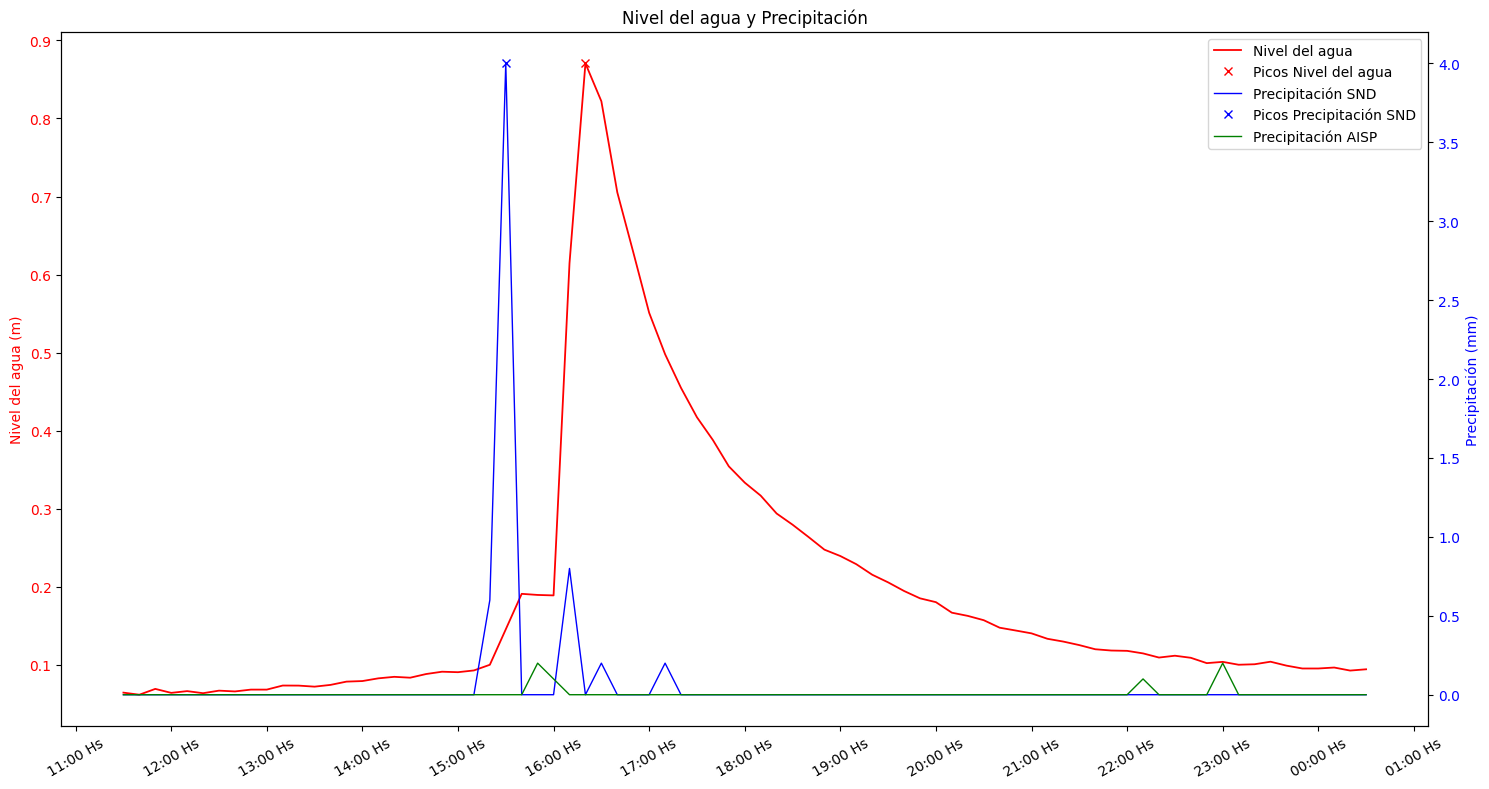

Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación SND: 0 days 00:50:00
Pico más alto de Nivel del agua: 0.870577936549917 m
Pico más alto de Precipitación SND: 4.0 mm


In [132]:
# Usar la función con tus datos y rangos de tiempo
start_date = '2021-06-09 07:30'
end_date = '2021-06-09 20:30'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP, interval=1, interval_unit='hours')

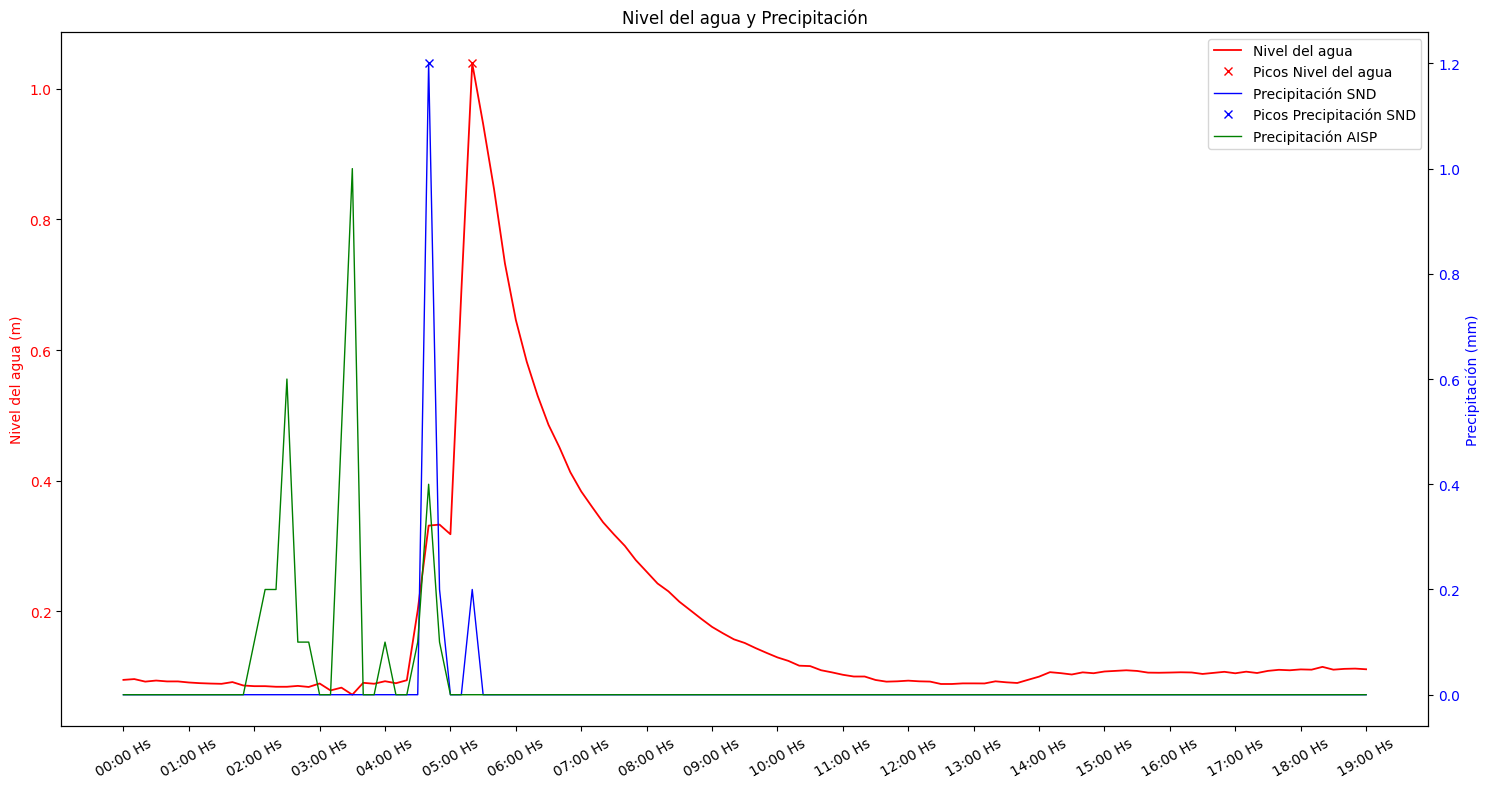

Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación SND: 0 days 00:40:00
Pico más alto de Nivel del agua: 1.03888232023415 m
Pico más alto de Precipitación SND: 1.2 mm
Pico más alto de Precipitación AISP: 1.0 mm


In [133]:
# Llamada a la función con las fechas especificadas y los DataFrames correspondientes
start_date = '2021-06-9 20:00'
end_date = '2021-06-10 15:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP,interval=1, interval_unit='hours')

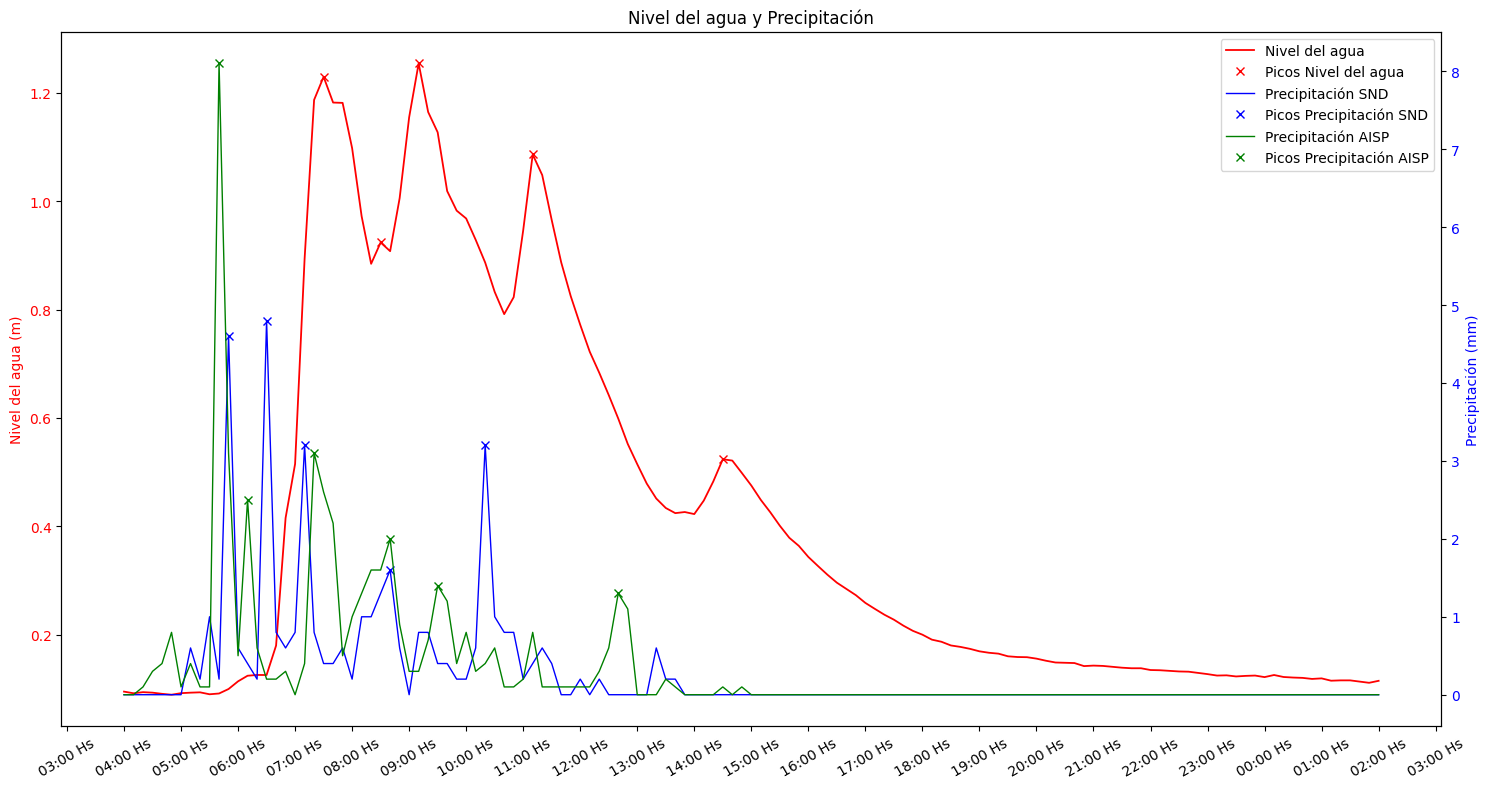

Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación SND: 0 days 01:40:00
Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación AISP: 0 days 01:50:00
Pico más alto de Nivel del agua: 1.25466138228759 m
Pico más alto de Precipitación SND: 4.8 mm
Pico más alto de Precipitación AISP: 8.1 mm


In [134]:
# Seleccionar el rango de fechas
start_date = '2021-07-15 00:00'
end_date = '2021-07-15 22:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP,interval=1, interval_unit='hours')

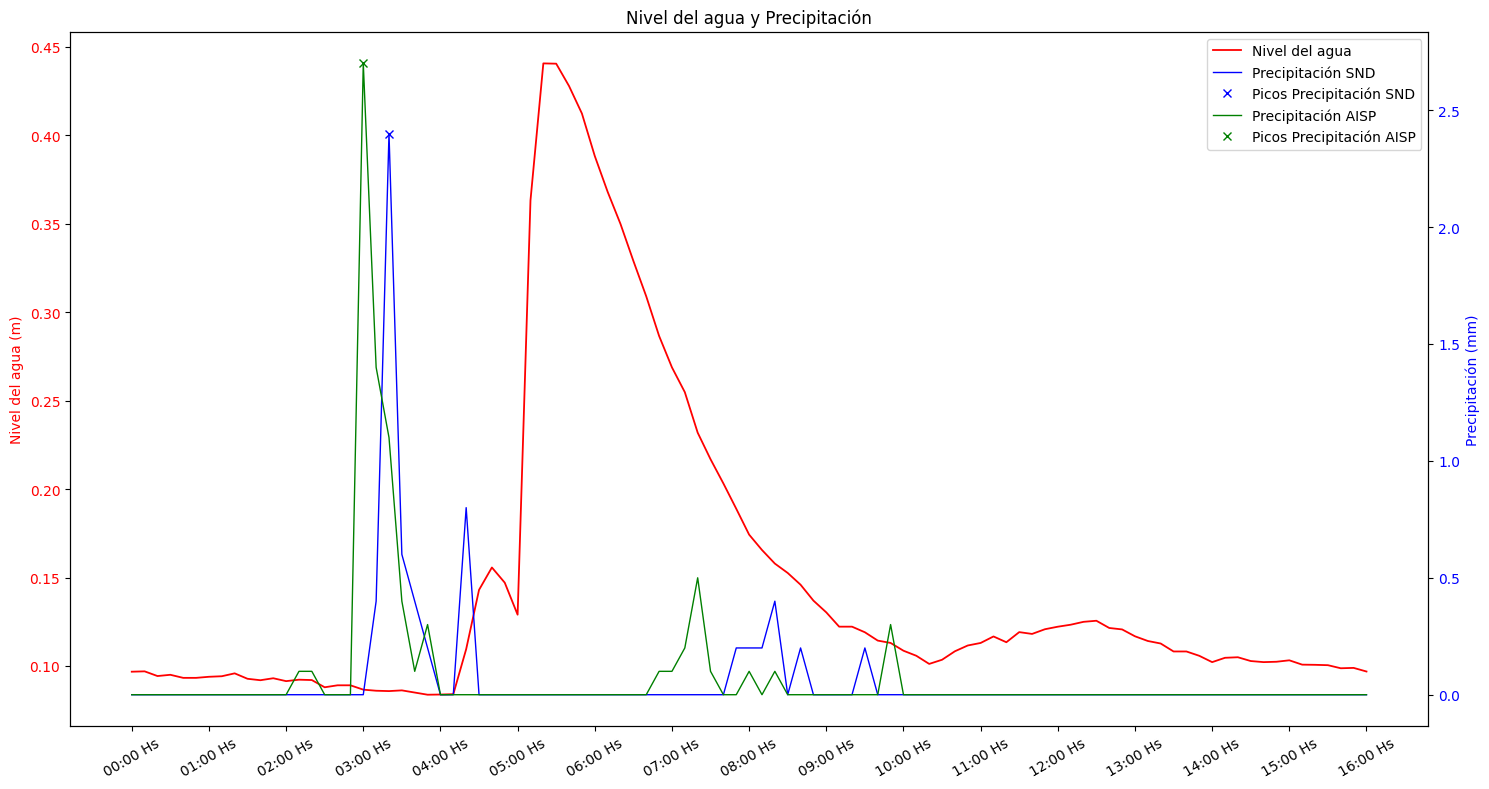

Pico más alto de Precipitación SND: 2.4 mm
Pico más alto de Precipitación AISP: 2.7 mm


In [135]:

# Seleccionar el rango de fechas
start_date = '2021-07-26 20:00'
end_date = '2021-07-27 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP,interval=1, interval_unit='hours')

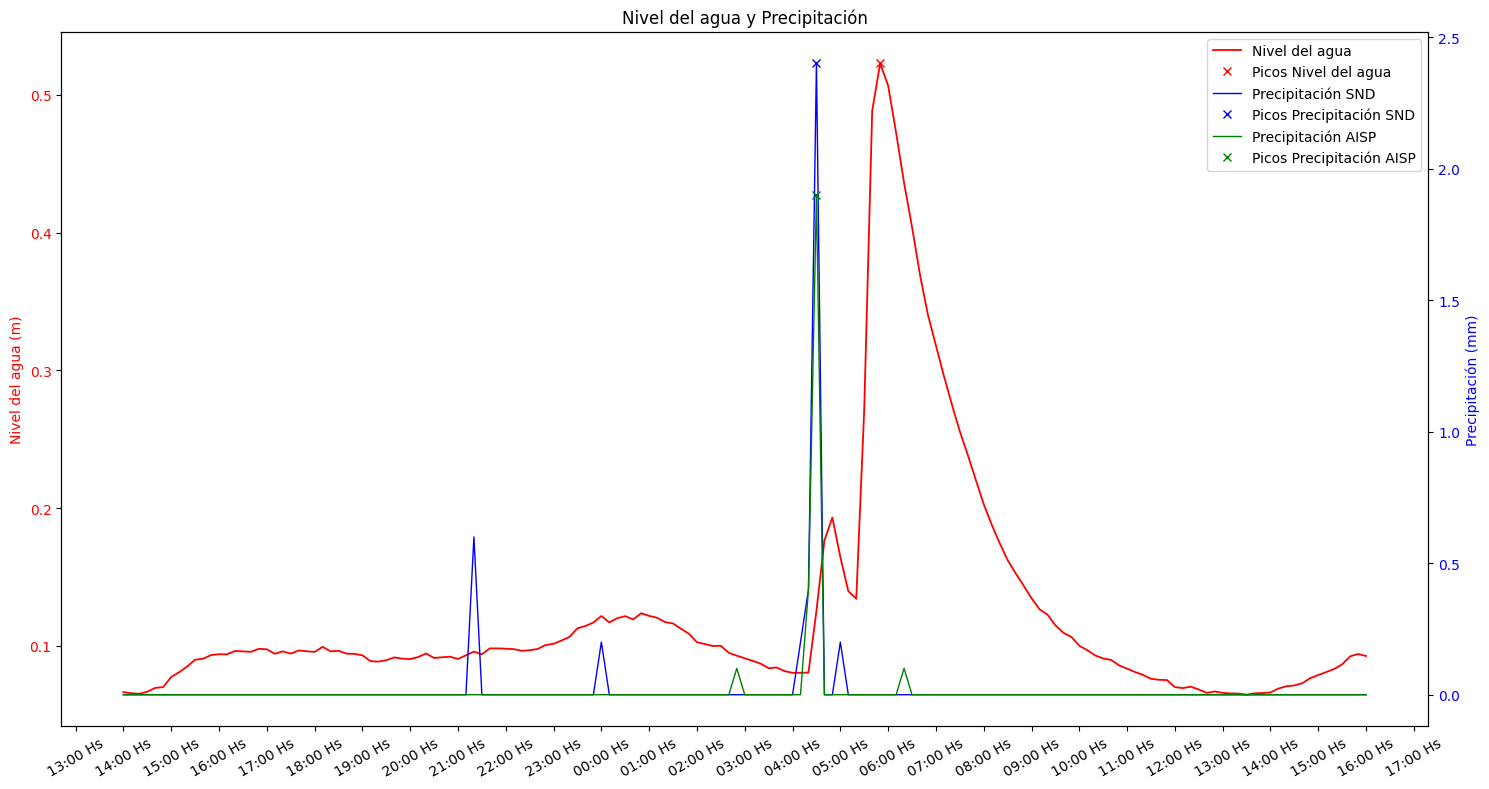

Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación SND: 0 days 01:20:00
Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación AISP: 0 days 01:20:00
Pico más alto de Nivel del agua: 0.522812995261997 m
Pico más alto de Precipitación SND: 2.4 mm
Pico más alto de Precipitación AISP: 1.9 mm


In [136]:
start_date = '2021-08-24 10:00'
end_date = '2021-08-25 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP,interval=1, interval_unit='hours')

In [137]:
#unión de dataframes 
df_combined = df_new.join([df_AISP,df_SND],how='inner')

In [138]:
df_combined

,nivel,Precipitacion_AISP_mm,Precipitacion_SND_mm
Fecha,,,
2021-05-24 17:50:00-04:00,0.097351,0.0,0.0
2021-05-24 18:00:00-04:00,0.082633,0.0,0.0
2021-05-24 18:10:00-04:00,0.058515,0.0,0.0
2021-05-24 18:20:00-04:00,0.128404,0.0,0.0
2021-05-24 18:30:00-04:00,0.119611,0.0,0.0
...,...,...,...
2021-08-31 19:10:00-04:00,0.080000,0.0,0.0
2021-08-31 19:20:00-04:00,0.080000,0.0,0.0
2021-08-31 19:30:00-04:00,0.070000,0.0,0.0


In [139]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

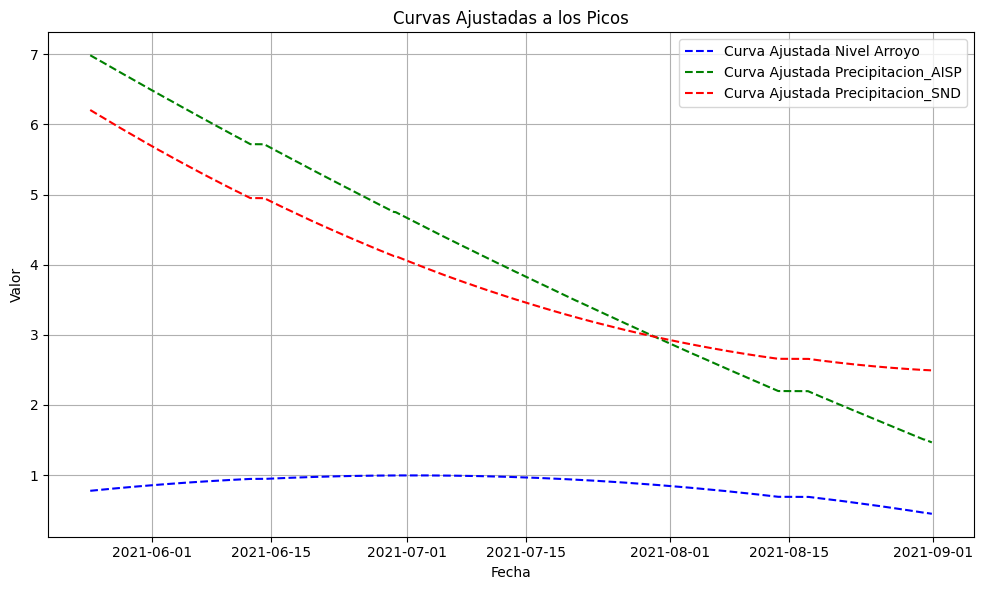

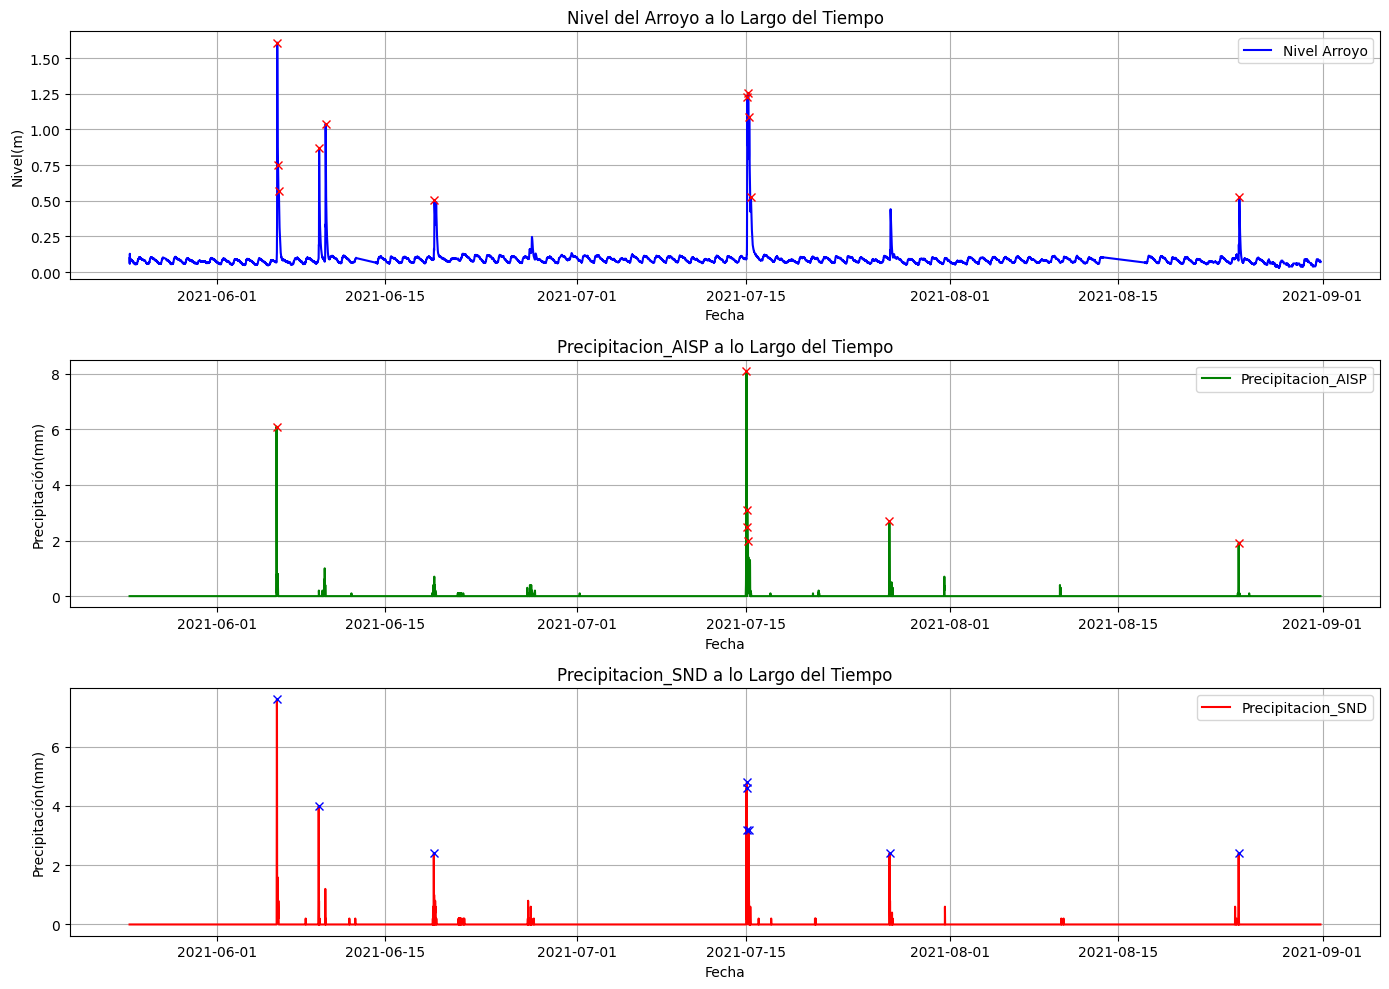

In [149]:
# Función para ajustar una curva polinomial a los picos
def fit_curve(x, y, peaks, degree=2):
    x_peaks = x[peaks]
    y_peaks = y[peaks]
    coeffs = np.polyfit(x_peaks, y_peaks, degree)
    curve = np.poly1d(coeffs)
    return curve
peaks_nivel, _ = find_peaks(df_combined['nivel'], height=0.5)

# Encontrar picos mayores a 2 mm en la columna 'Precipitacion_AISP_mm'
peaks_precip_AISP, _ = find_peaks(df_combined['Precipitacion_AISP_mm'], height=1.5)

# Encontrar picos mayores a 2 mm en la columna 'Precipitacion_SND_mm'
peaks_precip_SND, _ = find_peaks(df_combined['Precipitacion_SND_mm'], height=2)
# Ajustar curvas a los picos
x = np.arange(len(df_combined))  # Usar índices como x
curve_nivel = fit_curve(x, df_combined['nivel'], peaks_nivel)
curve_precip_AISP = fit_curve(x, df_combined['Precipitacion_AISP_mm'], peaks_precip_AISP)
curve_precip_SND = fit_curve(x, df_combined['Precipitacion_SND_mm'], peaks_precip_SND)

# Crear gráfico de las curvas ajustadas
plt.figure(figsize=(10, 6))

# Curva ajustada para el nivel del arroyo
plt.plot(df_combined.index, curve_nivel(x), '--', color='b', label='Curva Ajustada Nivel Arroyo')

# Curva ajustada para la precipitación AISP
plt.plot(df_combined.index, curve_precip_AISP(x), '--', color='g', label='Curva Ajustada Precipitacion_AISP')

# Curva ajustada para la precipitación SND
plt.plot(df_combined.index, curve_precip_SND(x), '--', color='r', label='Curva Ajustada Precipitacion_SND')

plt.title('Curvas Ajustadas a los Picos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar los picos y las series originales en subplots separados
plt.figure(figsize=(14, 10))

# Gráfico del nivel del arroyo
plt.subplot(3, 1, 1)
plt.plot(df_combined.index, df_combined['nivel'], label='Nivel Arroyo', color='b')
plt.plot(df_combined.index[peaks_nivel], df_combined['nivel'].iloc[peaks_nivel], 'x', color='r')
plt.title('Nivel del Arroyo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Nivel(m)')
plt.legend()
plt.grid(True)

# Gráfico de la precipitación AISP
plt.subplot(3, 1, 2)
plt.plot(df_combined.index, df_combined['Precipitacion_AISP_mm'], label='Precipitacion_AISP', color='g')
plt.plot(df_combined.index[peaks_precip_AISP], df_combined['Precipitacion_AISP_mm'].iloc[peaks_precip_AISP], 'x', color='r')
plt.title('Precipitacion_AISP a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación(mm)')
plt.legend()
plt.grid(True)

# Gráfico de la precipitación SND
plt.subplot(3, 1, 3)
plt.plot(df_combined.index, df_combined['Precipitacion_SND_mm'], label='Precipitacion_SND', color='r')
plt.plot(df_combined.index[peaks_precip_SND], df_combined['Precipitacion_SND_mm'].iloc[peaks_precip_SND], 'x', color='b')
plt.title('Precipitacion_SND a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación(mm)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

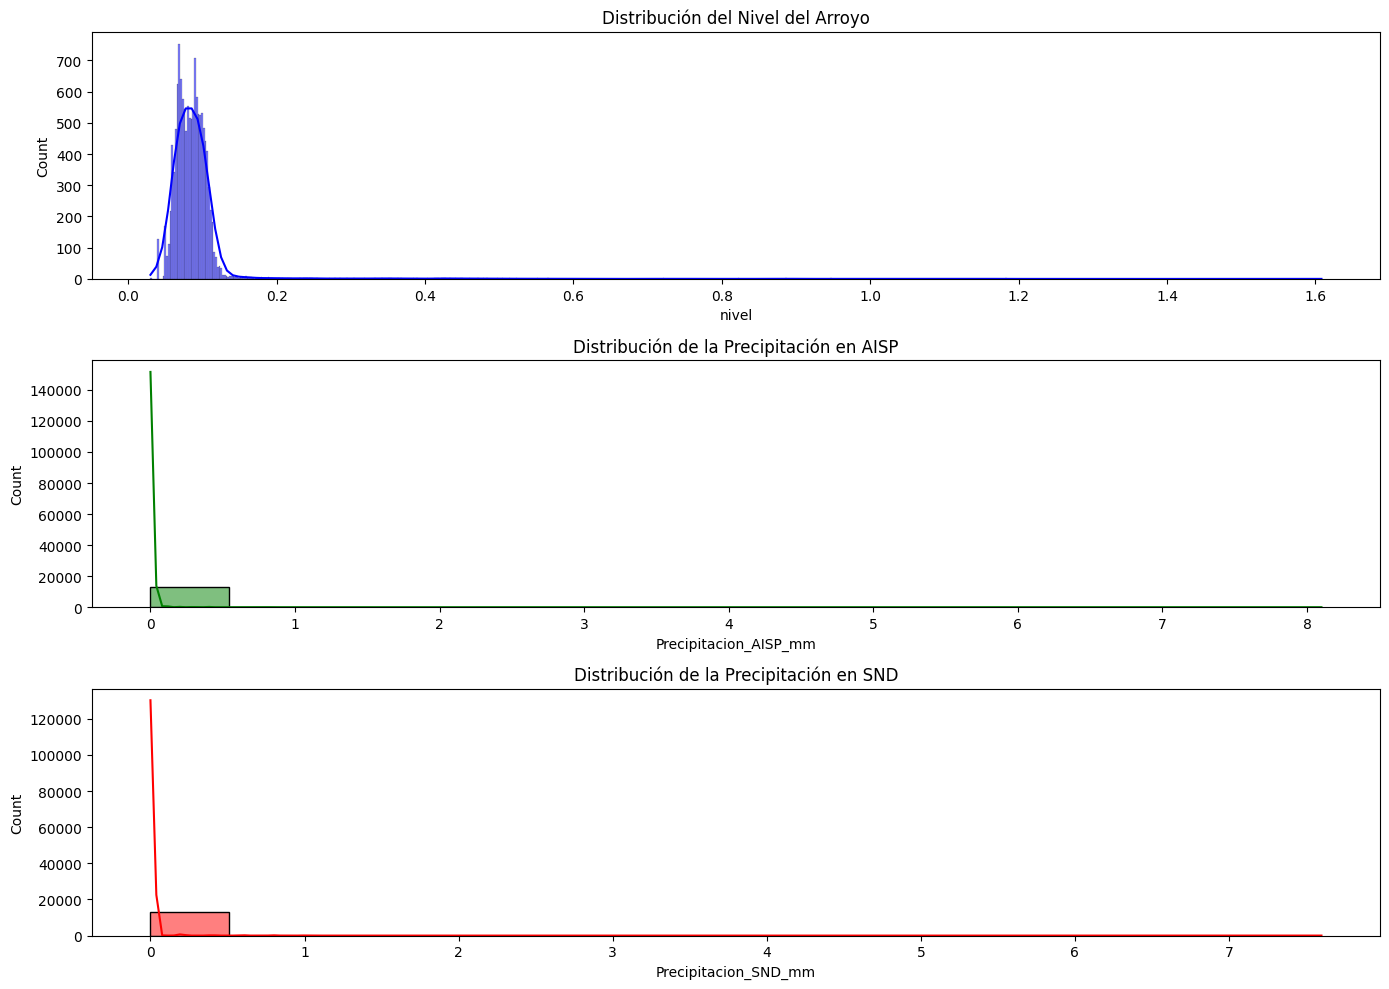

In [150]:
import seaborn as sns

# Histograma de cada variable
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.histplot(df_combined['nivel'], kde=True, color='b')
plt.title('Distribución del Nivel del Arroyo')

plt.subplot(3, 1, 2)
sns.histplot(df_combined['Precipitacion_AISP_mm'], kde=True, color='g')
plt.title('Distribución de la Precipitación en AISP')

plt.subplot(3, 1, 3)
sns.histplot(df_combined['Precipitacion_SND_mm'], kde=True, color='r')
plt.title('Distribución de la Precipitación en SND')

plt.tight_layout()
plt.show()

In [33]:
# Identificar valores faltantes
missing_values = df_combined.isnull().sum()
print("Valores faltantes en cada columna:\n", missing_values)


Valores faltantes en cada columna:
 nivel                    0
Precipitacion_AISP_mm    0
Precipitacion_SND_mm     0
dtype: int64


In [41]:
# Resamplear los datos a intervalos de 20 minutos
df_resampled_AISP = df_AISP.resample('1H').sum()
#df_interpolated_linear_AISP = df_resampled_AISP.interpolate(method='linear')
#df_interpolated_spline_AISP = df_resampled_AISP.interpolate(method='spline', order=3)

In [42]:
df_resampled_AISP.head()

,Precipitacion_AISP_mm
Fecha,
2021-05-24 13:00:00-04:00,0.0
2021-05-24 14:00:00-04:00,0.0
2021-05-24 15:00:00-04:00,0.0
2021-05-24 16:00:00-04:00,0.0
2021-05-24 17:00:00-04:00,0.0


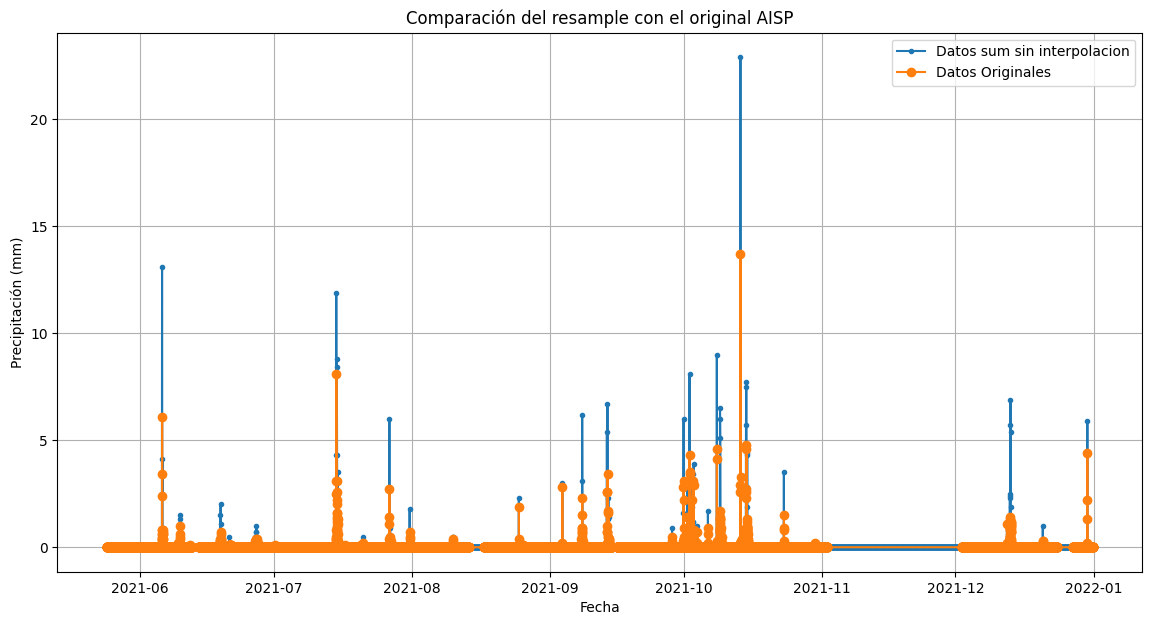

In [55]:
plt.figure(figsize=(14, 7))
#grafico sin interpolación
plt.plot(df_resampled_AISP.index, df_resampled_AISP['Precipitacion_AISP_mm'], label='Datos sum sin interpolacion', marker='.')
# Gráfico de los datos originales
plt.plot(df_AISP.index, df_AISP['Precipitacion_AISP_mm'], label='Datos Originales', marker='o')

# Gráfico de los datos interpolados linealmente
#plt.plot(df_interpolated_linear_AISP.index, df_interpolated_linear_AISP['Precipitacion_AISP_mm'], label='Interpolación Lineal', linestyle='--')

# Gráfico de los datos interpolados con spline cúbica
#plt.plot(df_interpolated_spline_AISP.index, df_interpolated_spline_AISP['Precipitacion_AISP_mm'], label='Interpolación Spline Cúbica', linestyle=':')

plt.title('Comparación del resample con el original AISP')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Resamplear los datos a intervalos de 20 minutos
df_resampled_SND = df_SND.resample('1H').sum()
#df_interpolated_linear_SND = df_resampled_SND.interpolate(method='linear')
#df_interpolated_spline_SND = df_resampled_SND.interpolate(method='spline', order=3)

In [57]:
df_resampled_SND.head()

,Precipitacion_SND_mm
Fecha,
2021-05-24 13:00:00-04:00,0.0
2021-05-24 14:00:00-04:00,0.0
2021-05-24 15:00:00-04:00,0.0
2021-05-24 16:00:00-04:00,0.0
2021-05-24 17:00:00-04:00,0.0


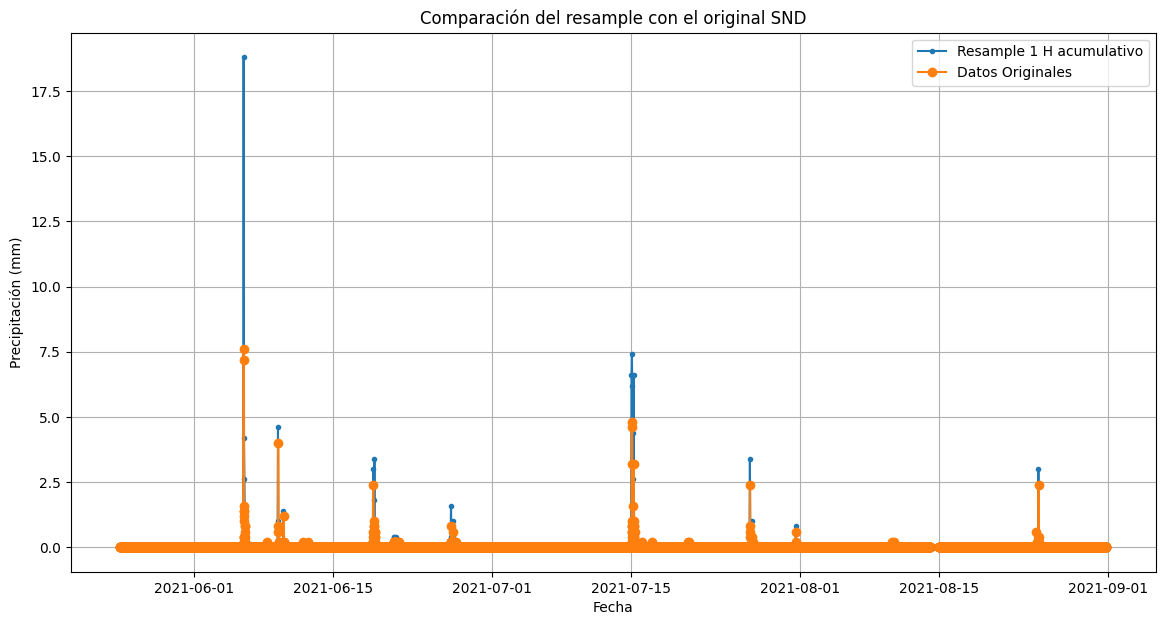

In [58]:
plt.figure(figsize=(14, 7))
#grafico sin interpolación
plt.plot(df_resampled_SND.index, df_resampled_SND['Precipitacion_SND_mm'], label='Resample 1 H acumulativo', marker='.')
# Gráfico de los datos originales
plt.plot(df_SND.index, df_SND['Precipitacion_SND_mm'], label='Datos Originales', marker='o')

# Gráfico de los datos interpolados linealmente
#plt.plot(df_interpolated_linear_SND.index, df_interpolated_linear_SND['Precipitacion_SND_mm'], label='Interpolación Lineal', linestyle='--')

# Gráfico de los datos interpolados con spline cúbica
#plt.plot(df_interpolated_spline_SND.index, df_interpolated_spline_SND['Precipitacion_SND_mm'], label='Interpolación Spline Cúbica', linestyle=':')

plt.title('Comparación del resample con el original SND')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.legend()
plt.grid(True)
plt.show()

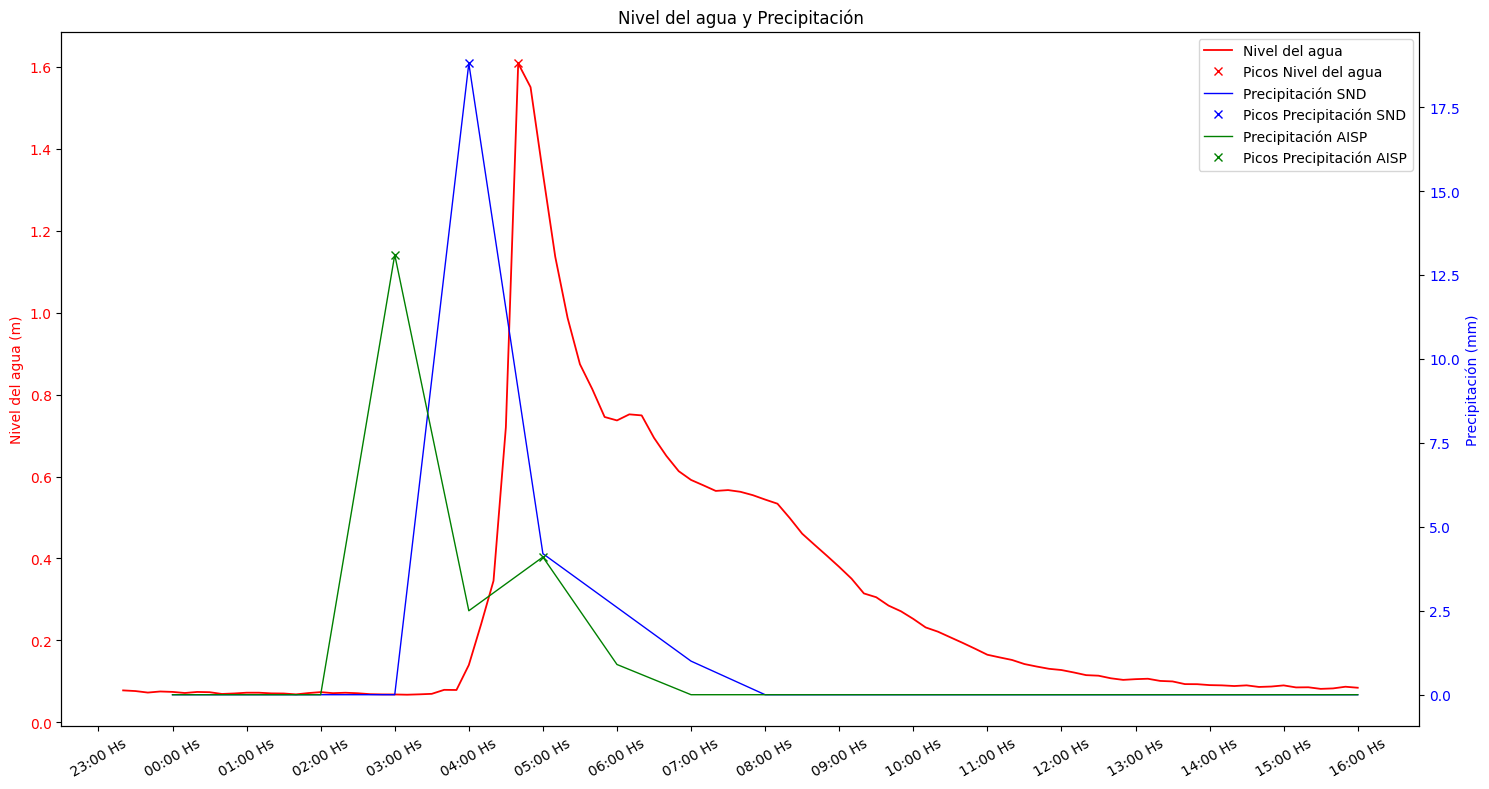

Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación SND: 0 days 00:40:00
Diferencia de tiempo entre el primer pico de Nivel del agua y el primer pico de Precipitación AISP: 0 days 01:40:00
Pico más alto de Nivel del agua: 1.60807472637885 m
Pico más alto de Precipitación SND: 18.8 mm
Pico más alto de Precipitación AISP: 13.1 mm


In [75]:
start_date = '2021-06-5 19:20'
end_date = '2021-06-6 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_resampled_SND, df_resampled_AISP,interval=1, interval_unit='hours')